<a href="https://colab.research.google.com/github/Nikhil-Raj-202/Unsupervised_Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    "CustomerID": range(1, 21),
    "Age": [19, 21, 20, 23, 31, 35, 40, 42, 50, 55, 60, 23, 21, 33, 45, 38, 46, 59, 29, 41],
    "Annual_Income": [15, 16, 17, 18, 19, 35, 40, 42, 50, 55, 60, 23, 22, 35, 48, 49, 55, 68, 30, 39],  # In thousands
    "Spending_Score": [39, 81, 6, 77, 40, 66, 50, 42, 80, 60, 70, 90, 85, 55, 65, 75, 72, 35, 48, 67],  # Arbitrary scale
}
df = pd.DataFrame(data)

x = df[["Annual_Income","Spending_Score"]]

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x)

inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_Scaled)
  inertia.append(kmeans.inertia_)

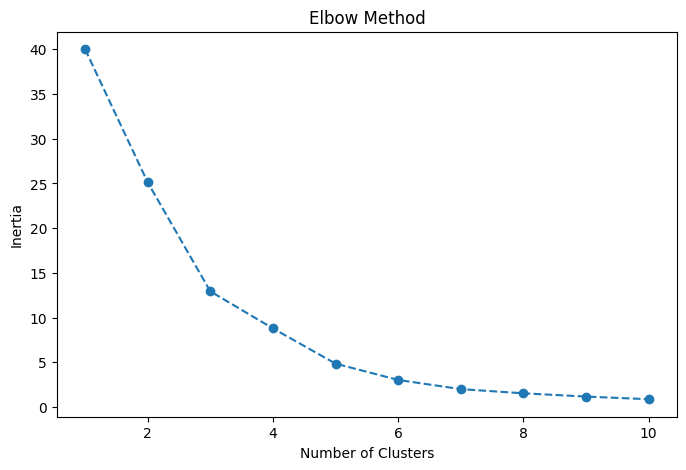

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(range(1,11), inertia,marker="o", linestyle = "--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_Scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

<ipython-input-20-c782e644f993>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Cluster")


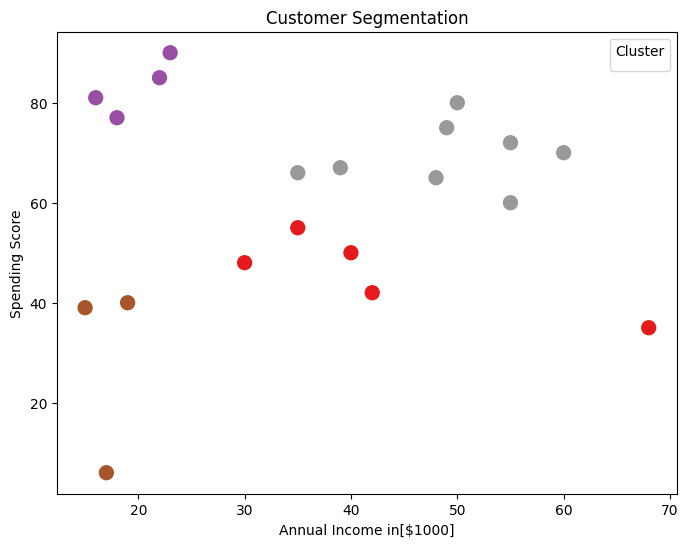

    CustomerID  Age  Annual_Income  Spending_Score  Cluster
0            1   19             15              39        2
1            2   21             16              81        1
2            3   20             17               6        2
3            4   23             18              77        1
4            5   31             19              40        2
5            6   35             35              66        3
6            7   40             40              50        0
7            8   42             42              42        0
8            9   50             50              80        3
9           10   55             55              60        3
10          11   60             60              70        3
11          12   23             23              90        1
12          13   21             22              85        1
13          14   33             35              55        0
14          15   45             48              65        3
15          16   38             49      

In [ ]:
df["Cluster"] = kmeans.fit_predict(X_Scaled)
plt.figure(figsize=(8,6))
plt.scatter(x=df["Annual_Income"], y=df["Spending_Score"], c=df["Cluster"], cmap="Set1", s=100)
plt.title("Customer Segmentation")
plt.xlabel("Annual Income in[$1000]")
plt.ylabel("Spending Score")
plt.legend(title = "Cluster")
plt.show()
print(df)